# Normal Distribution

This is the probability density function in latex.

$ \frac{1} {\sigma \sqrt { 2 \pi }} e -\frac{1}{2}  (\frac{ x - \mu } {\sigma})^2 \\[1ex] $ 

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom

A Normal Distribution is also known as a Gaussian distribution or famously Bell Curve. People use both words interchangeably, but it means the same thing. It is a continuous probability distribution.[1]

I firstly used numpy random to draw random samples from a normal (Gaussian) distribution. The probability density function of the normal distribution, first derived by De Moivre and 200 years later by both Gauss and Laplace independently, is often called the bell curve because of its characteristic shape (see the example below).The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution [2].

Probability Density Function for Gaussian distribution in Latex:

$ p(x) = \frac{1} {\sqrt { 2 \pi \sigma^2 }} e - (\frac{ (x - \mu) ^2 } {2\sigma^2}) \\[1ex] $ 

In [11]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
## generates a hundred numbers based on sigma

print (s)

[-5.72491126e-02 -4.08048716e-02  6.26461483e-02 -1.67179429e-01
  5.66310444e-02  1.36068921e-02  9.96917975e-02 -3.53372859e-02
 -7.17544691e-02  3.45388386e-02 -1.43403621e-01  1.05727427e-01
  3.78052872e-02  8.78765079e-03  1.11747658e-01 -3.77508603e-02
  6.74064387e-02 -4.13510093e-02  4.30687390e-02 -6.53710906e-02
 -1.12613283e-03 -1.04008980e-01  4.68519177e-02 -1.17923454e-02
  1.36707256e-01  1.78398297e-01 -4.00827652e-02  2.20823713e-02
  1.20661757e-01 -2.96376097e-02 -6.43366773e-02 -2.82714466e-01
 -2.68384972e-02  5.12850051e-02 -8.39838336e-02  7.35495824e-02
  2.43601616e-01  1.64556643e-01 -9.16176332e-02 -5.20009148e-02
  2.31677527e-01 -1.67665848e-01  7.81149864e-02  8.64955920e-02
 -1.98974358e-01  1.03588155e-01 -7.77799401e-02  5.31921827e-02
 -4.96860482e-02  2.05254243e-01  1.99950032e-01  2.00528690e-02
  3.78242225e-02 -5.38279759e-02  1.77762864e-02 -4.19716921e-02
  2.76179720e-02 -2.30539216e-03  5.63651521e-02 -5.18375237e-02
  8.91402456e-02 -2.55677

In [12]:
abs(mu - np.mean(s))

## abs returns the absolute value of the specified number

## verifies the mean and the variance of the numbers above

0.0036791226065646053

In [13]:
abs(sigma - np.std(s, ddof=1))

## ddof=1 provides an unbiased estimator of the variance of the infinite population.

## generates the sigma - standard deviation 

0.0004326913127604276

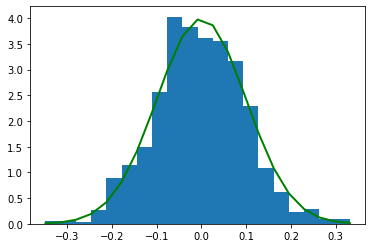

In [17]:
## code adapted from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

count, bins, ignored = plt.hist(s, 20, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         ## standard deviation formula based on the latex formula from above
         linewidth=2, color='g')
plt.show()

This will display a histogram of the samples in the probability density function.

It looks like a bell curve based on the formula which we used above based on the derivation by De Moivre.

## Scipy stats and comparing a Normal and Frozen CDF 

There is also a built in scipy variable that I will also investigate further. Scipy allows you to shift and/or scale the distribution use the loc and scale parameters and then test whether the values will result in a normal distribution. 

The below example uses Percent-Point Function (PPF) and allows us to compare it to the Cumulative Distribution Function (CDF).

Cumulative Distribution Function (CDF) is used to describe the probability distribution of random variables. It can be used to describe the probability for a discrete, continuous or mixed variable. It is obtained by summing up the probability density function and getting the cumulative probability for a random variable. [4]

Probability Point Function or PPF is the inverse of the CDF which is why it is being used in the example below but I will quickly explain what it is used for.The probability density function is a derivative of the distribution function, which characterizes the density with which the values of the random variable are distributed at a given point. [5]

The example below shows us how valuable scipy is for developing graphs and how built in functions allow us to test whether the graph has a normal CDF.

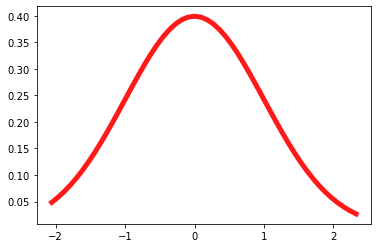

In [55]:
## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

fig, ax = plt.subplots(1, 1)

## creates a plot

mean, var, skew, kurt = norm.stats(moments='mvsk')

## Takes the first 4 moments

x = np.linspace(norm.ppf(0.02),
                norm.ppf(0.99), 50)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.9, label='norm pdf')

## Displays the PDF

## alpha changes the thickness and colour of line, 0.9 makes line thicker

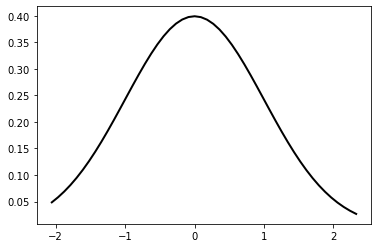

In [35]:
## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.02),
                norm.ppf(0.99), 50)

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [24]:

## This will check the accuracy
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

## np.allcose returnst rue if two arrays are element-wise equal within a tolerance.

True

In [50]:
## This will check the accuracy
vals = norm.ppf([0.12, 0.8, 0.991])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

False

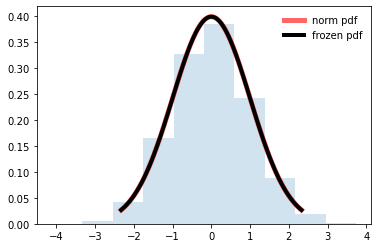

In [54]:
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=4, label='frozen pdf')

r = norm.rvs(size=10000)

ax.hist(r, density=True, alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


References Used in Notebook

[1] https://www.askpython.com/python/normal-distribution

[2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[4] https://www.simplilearn.com/tutorials/statistics-tutorial/cumulative-distribution-function

[5] https://radzion.com/blog/probability/density